__Importing Packages and Loading Dataset__

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load dataset and set headers (as named on uci irvine website)
headers = ['buying-price',
           'maintenance',
           'num-doors',
           'num-capacity',
           'trunk-size', 
           'safety',
           'accessibility']
car_dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
                   names=headers, index_col=False, na_values=' ?')

In [3]:
car_dataset

,buying-price,maintenance,num-doors,num-capacity,trunk-size,safety,accessibility
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
print(car_dataset.shape)

(1728, 7)


We will now check for null values, and drop them if there are any.

In [5]:
car_dataset.dropna(inplace=True)

In [6]:
print(car_dataset.shape)

(1728, 7)


As we can see, there are no null values in the dataset, hence we have the same shape. We will now check the types of the features to see if any are categorical.

In [7]:
car_dataset.dtypes

buying-price     object
maintenance      object
num-doors        object
num-capacity     object
trunk-size       object
safety           object
accessibility    object
dtype: object

Because there are categorical features present, we will convert these to numerical values using dummy variables. 

In [8]:
# get dummy variables 
car_dataset = pd.get_dummies(car_dataset)

In [9]:
car_dataset

,buying-price_high,buying-price_low,buying-price_med,buying-price_vhigh,maintenance_high,maintenance_low,maintenance_med,maintenance_vhigh,num-doors_2,num-doors_3,...,trunk-size_big,trunk-size_med,trunk-size_small,safety_high,safety_low,safety_med,accessibility_acc,accessibility_good,accessibility_unacc,accessibility_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
5,0,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
7,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
8,0,0,0,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
9,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [10]:
# drop 3 other classification labels so remaning was os unaccessable or accessible
car_dataset = car_dataset.drop(columns = ['accessibility_acc','accessibility_good','accessibility_vgood'])

In [11]:
print(car_dataset.shape)

(1728, 22)


In [12]:
car_dataset

,buying-price_high,buying-price_low,buying-price_med,buying-price_vhigh,maintenance_high,maintenance_low,maintenance_med,maintenance_vhigh,num-doors_2,num-doors_3,...,num-capacity_2,num-capacity_4,num-capacity_more,trunk-size_big,trunk-size_med,trunk-size_small,safety_high,safety_low,safety_med,accessibility_unacc
0,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,1
3,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,1
4,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,1
5,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1
6,0,0,0,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,1
7,0,0,0,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,1
8,0,0,0,1,0,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,1
9,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,1


__Helper Functions__

In [13]:
# function to draw heatmap for linear svm
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [14]:
# function to draw heatmap for rbf svm
def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show() 

In [15]:
# function to draw heatmap for k nearest neighbors
def draw_heatmap_KNN(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [16]:
# function to draw heatmap for decision tree
def draw_heatmap_decisionTree(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t $depth$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [17]:
# function to draw heatmap for random forest
def draw_heatmap_randomForest(acc, acc_desc, f_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=f_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='features')
    plt.title(acc_desc + ' w.r.t $features$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [18]:
# function for linear svm
def linearSVM():
    # create the classifier and perform gridsearch to obtain an optimal C
    classifier = svm.SVC(kernel='linear')
    C_list = np.array([10**-3, 10**-2, 10**-1,10**0,10**1,10**2, 10**3]) # Different C to try.
    params = {"C": C_list}

    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val,Y_train_val)
    
    # draw heatmaps for the training and validation results 
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_linear(train_acc.reshape(-1,1), 'linear svm train accuracy', C_list)

    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_linear(val_acc.reshape(-1,1), 'linear svm val accuracy', C_list)
    
    # get the training and validation accuracy associated with the best C
    for i,val in enumerate(C_list):
        if val == grid.best_params_['C']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal C to get the most optimal test accuracy
    op_classifier = svm.SVC(kernel = 'linear', C = grid.best_params_['C'] )
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['C']

In [19]:
# function for rbf svm
def rbfSVM():
    # create the classifier and perform gridsearch to obtain an optimal C and gamme
    classifier = svm.SVC(kernel = 'rbf')
    gamma_list     = np.array([0.001,0.005,0.01,0.05,0.1,0.5,1,2]) # Different gamma to try.
    C_list = np.array([10**-3, 10**-2, 10**-1,10**0,10**1,10**2,10**3]) # Different C to try.
    param_grid = dict(gamma=gamma_list, C=C_list)
    
    grid = GridSearchCV(estimator = classifier, param_grid = param_grid, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val,Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score'].reshape(7,8)
    draw_heatmap_RBF(train_acc, 'rbf svm train accuracy', gamma_list, C_list)

    val_acc = grid.cv_results_['mean_test_score'].reshape(7,8)
    draw_heatmap_RBF(val_acc, 'rbf svm val accuracy',gamma_list, C_list)
    
    # get the training and validation accuracy associated with the best C and gamma
    for i,val in enumerate(C_list):
        for j, val2 in enumerate(gamma_list):
            if ((val == grid.best_params_['C']) and (val2 == grid.best_params_['gamma'])):
                best_train_acc = train_acc[i,j]
                best_val_acc = val_acc[i,j]
    
    # train the classifier on the most optimal C and gamma to get the most optimal test accuracy 
    op_classifier = svm.SVC(kernel = 'rbf', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['C'], grid.best_params_['gamma']

In [20]:
# function for k nearest neighbors 
def knn():
    # create the classifier and perform gridsearch to obtain an optimal number of neighbors
    k_list = [1,2,3,4,5,6,7,8,9,10]
    params = {"n_neighbors": k_list}
    classifier = KNeighborsClassifier()
    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_KNN(train_acc.reshape(10,1), 'knn train accuracy', k_list)
    
    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_KNN(val_acc.reshape(10,1), 'knn val accuracy', k_list)
    
    # get the training and validation accuracy associated with the best number of neighbors
    for i,val in enumerate(k_list):
        if val == grid.best_params_['n_neighbors']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal number of neighbors to get the most optimal test accuracy
    op_classifier = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
    op_classifier.fit(X_train_val,Y_train_val)
    test_acc = op_classifier.score(X_test,Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['n_neighbors']

In [21]:
# function for decision tree
def decisionTree():
    # create the classifier and perform gridsearch to obtain an optimal  depth
    classifier = tree.DecisionTreeClassifier()
    D_list = [1,2,3,4,5]
    param_grid = {
                  "max_depth": D_list,
                  "criterion": ["entropy"]
                 }
    grid = GridSearchCV(classifier, param_grid, return_train_score = True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_decisionTree(train_acc.reshape(-1,1), 'decision tree train accuracy', D_list)

    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_decisionTree(val_acc.reshape(-1,1), 'decision tree val accuracy', D_list)
    
    # get the training and validation accuracy associated with the best depth
    for i,val in enumerate(D_list):
        if val == grid.best_params_['max_depth']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal depth to get the most optimal test accuracy
    op_classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = grid.best_params_['max_depth'])
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['max_depth']

In [22]:
# function for random forest
def randomForest():
    # create the classifier and perform gridsearch to obtain an optimal number of features
    f_list = [1,2,4,6,8,12,16, 20]
    params = {"max_features": f_list}
    classifier = RandomForestClassifier(n_estimators = 1024)
    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_randomForest(train_acc.reshape(8,1), 'random forest train accuracy', f_list)
    
    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_randomForest(val_acc.reshape(8,1), 'random forest val accuracy', f_list)
    
    # get the training and validation accuracy associated with the best number of features
    for i,val in enumerate(f_list):
        if val == grid.best_params_['max_features']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal number of features to get the most optimal test accuracy
    op_classifier = RandomForestClassifier(max_features=grid.best_params_['max_features'])
    op_classifier.fit(X_train_val,Y_train_val)
    test_acc = op_classifier.score(X_test,Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['max_features']

__Heatmaps and Final Reults__

Train Partition:  0.8


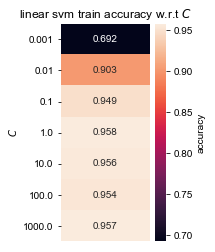

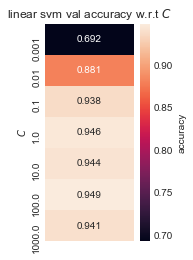

Test Accuracy for Linear SVM =  0.9739884393063584


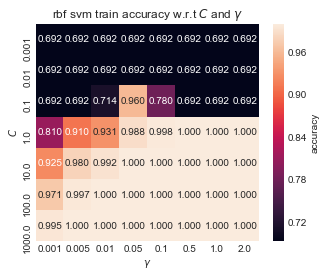

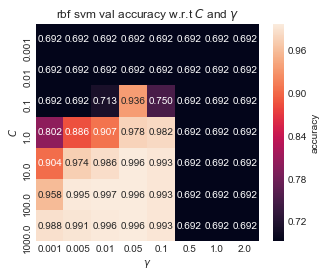

Test Accuracy for RBF SVM =  0.9913294797687862


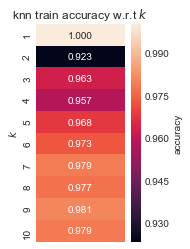

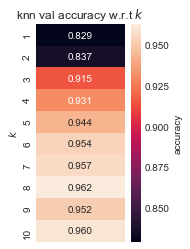

Test Accuracy for K Nearest Neighbors =  0.9682080924855492


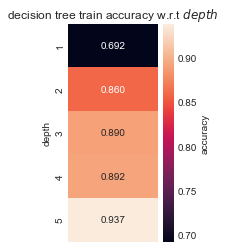

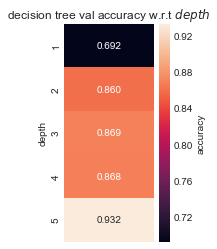

Test Accuracy for Decision Tree =  0.930635838150289


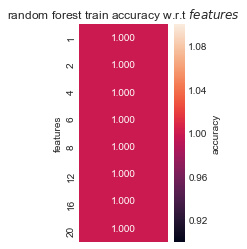

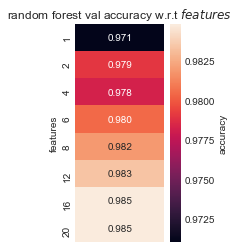

Test Accuracy for Random Forest =  0.9942196531791907


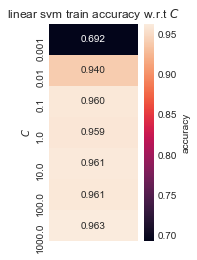

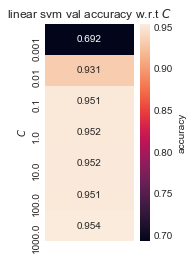

Test Accuracy for Linear SVM =  0.930635838150289


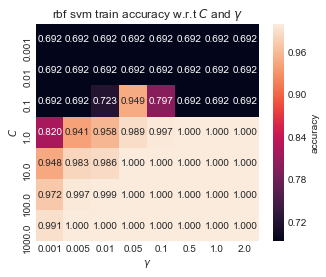

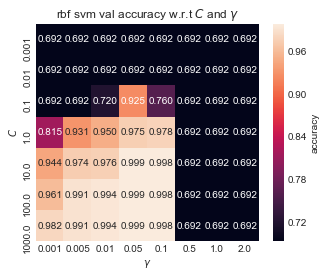

Test Accuracy for RBF SVM =  1.0


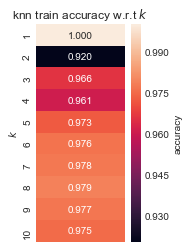

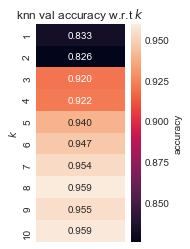

Test Accuracy for K Nearest Neighbors =  0.9710982658959537


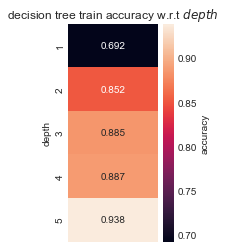

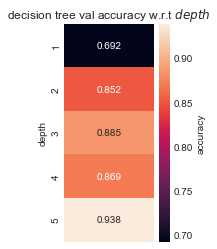

Test Accuracy for Decision Tree =  0.9421965317919075


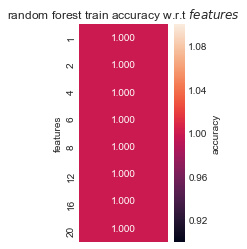

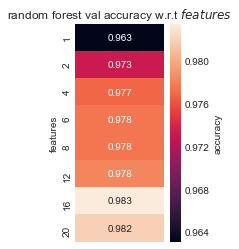

Test Accuracy for Random Forest =  0.9942196531791907


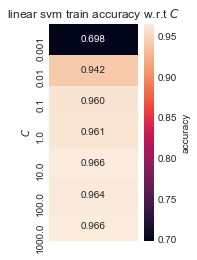

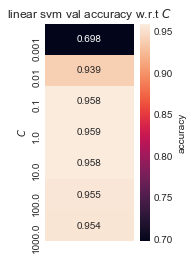

Test Accuracy for Linear SVM =  0.9364161849710982


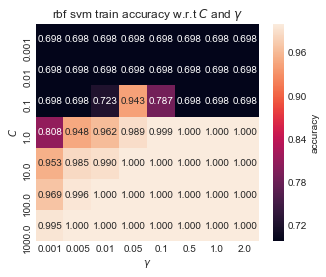

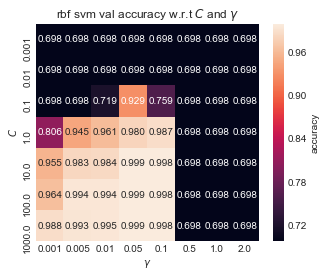

Test Accuracy for RBF SVM =  1.0


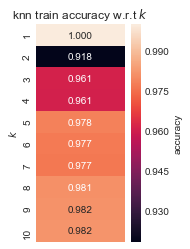

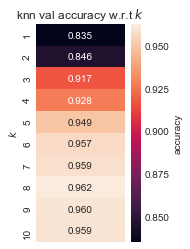

Test Accuracy for K Nearest Neighbors =  0.9797687861271677


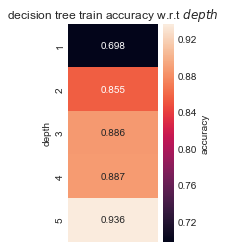

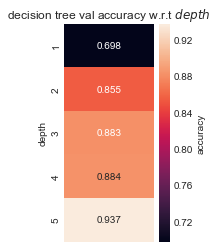

Test Accuracy for Decision Tree =  0.9364161849710982


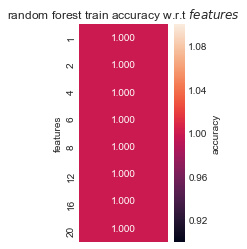

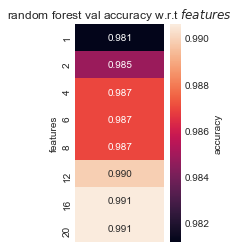

Test Accuracy for Random Forest =  0.9855491329479769
Train Partition:  0.5


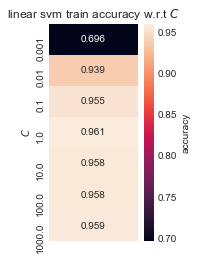

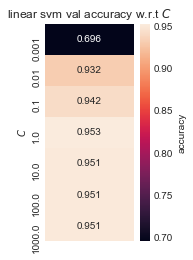

Test Accuracy for Linear SVM =  0.9560185185185185


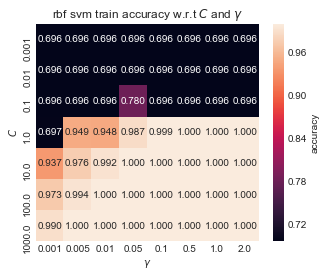

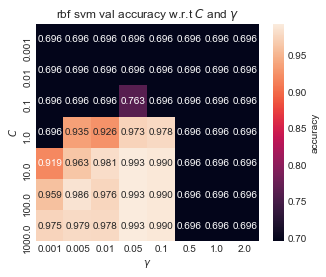

Test Accuracy for RBF SVM =  0.9953703703703703


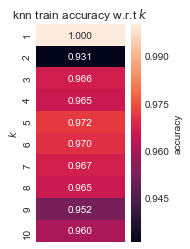

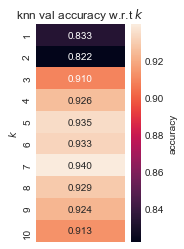

Test Accuracy for K Nearest Neighbors =  0.9571759259259259


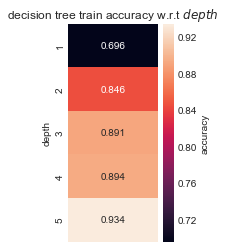

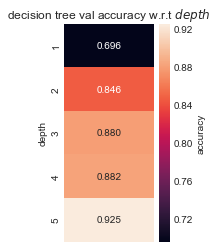

Test Accuracy for Decision Tree =  0.9398148148148148


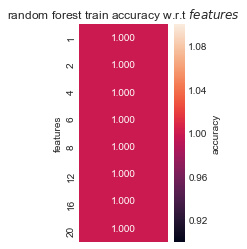

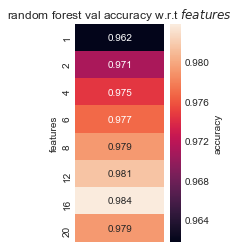

Test Accuracy for Random Forest =  0.9745370370370371


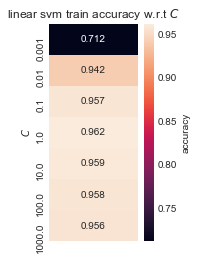

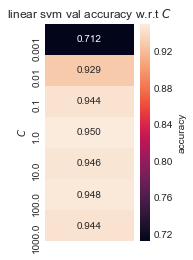

Test Accuracy for Linear SVM =  0.9525462962962963


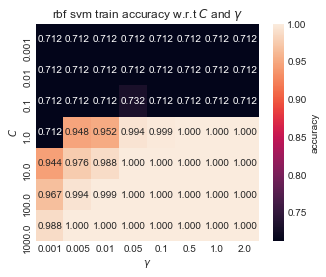

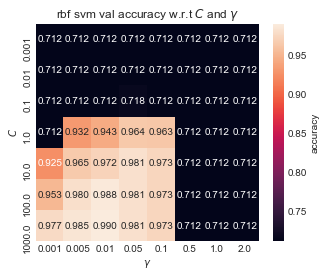

Test Accuracy for RBF SVM =  0.9942129629629629


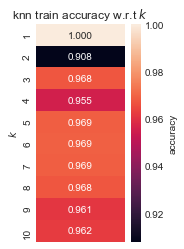

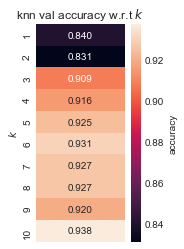

Test Accuracy for K Nearest Neighbors =  0.9560185185185185


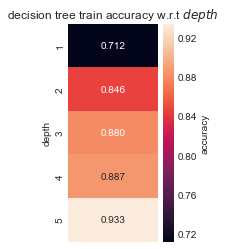

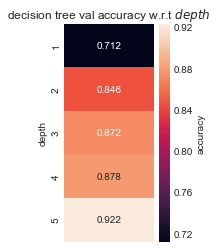

Test Accuracy for Decision Tree =  0.9247685185185185


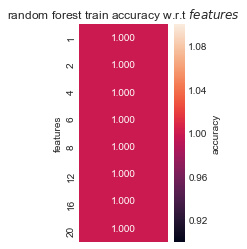

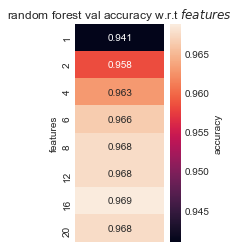

Test Accuracy for Random Forest =  0.9699074074074074


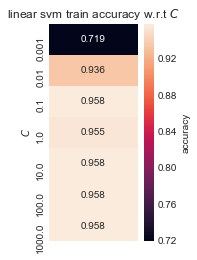

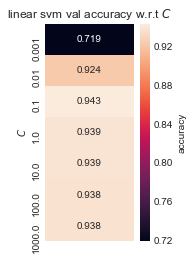

Test Accuracy for Linear SVM =  0.9502314814814815


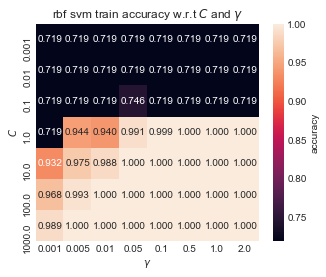

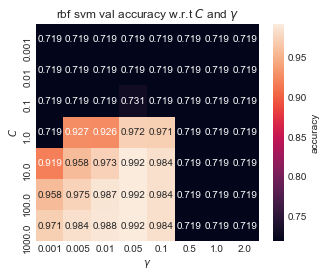

Test Accuracy for RBF SVM =  1.0


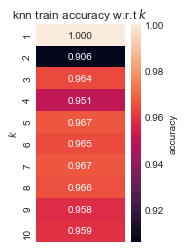

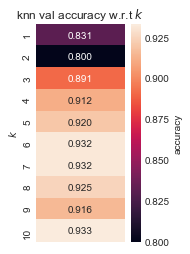

Test Accuracy for K Nearest Neighbors =  0.9502314814814815


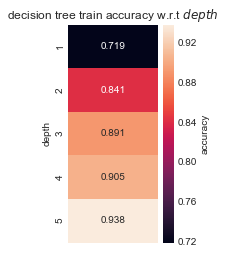

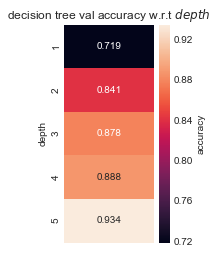

Test Accuracy for Decision Tree =  0.9375


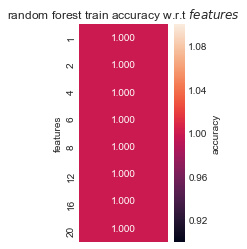

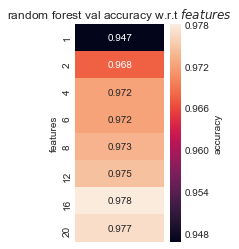

Test Accuracy for Random Forest =  0.9837962962962963
Train Partition:  0.2


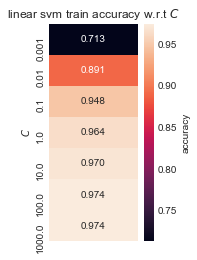

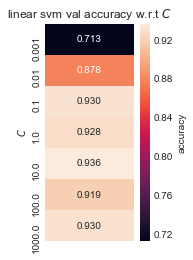

Test Accuracy for Linear SVM =  0.9392624728850325


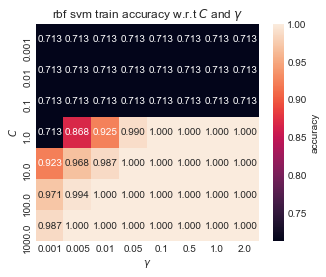

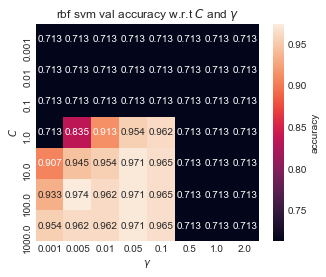

Test Accuracy for RBF SVM =  0.9768618944323934


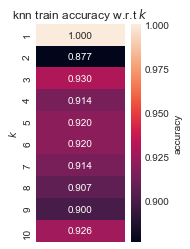

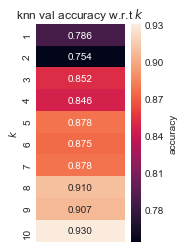

Test Accuracy for K Nearest Neighbors =  0.8828633405639913


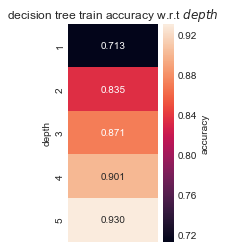

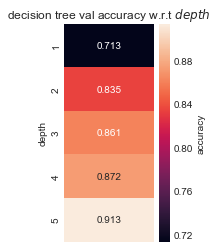

Test Accuracy for Decision Tree =  0.8749096167751266


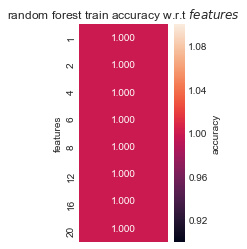

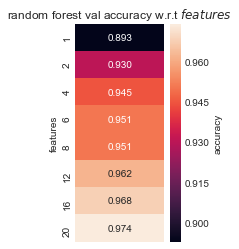

Test Accuracy for Random Forest =  0.9414316702819957


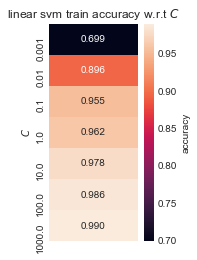

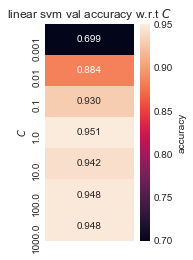

Test Accuracy for Linear SVM =  0.9501084598698482


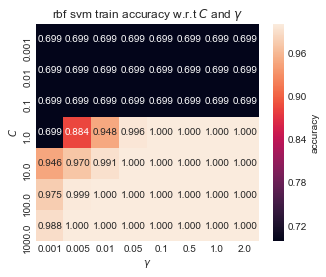

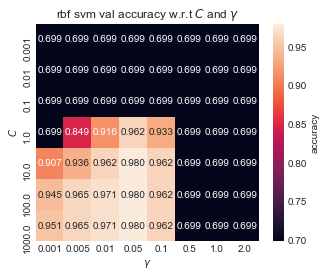

Test Accuracy for RBF SVM =  0.9746926970354303


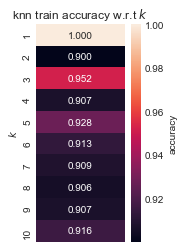

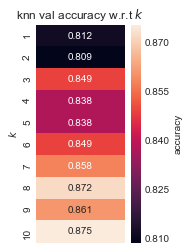

Test Accuracy for K Nearest Neighbors =  0.9161243673174259


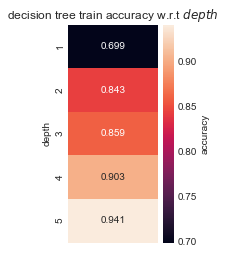

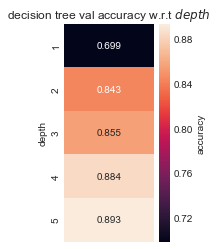

Test Accuracy for Decision Tree =  0.9370932754880694


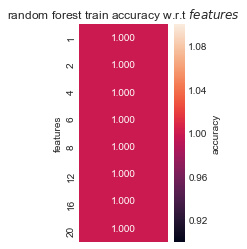

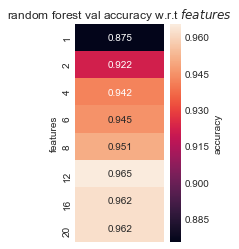

Test Accuracy for Random Forest =  0.9573391178597253


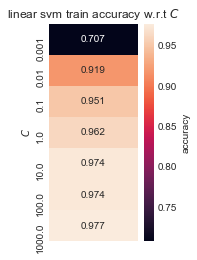

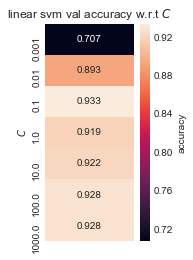

Test Accuracy for Linear SVM =  0.9385394070860448


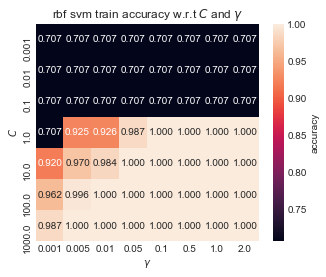

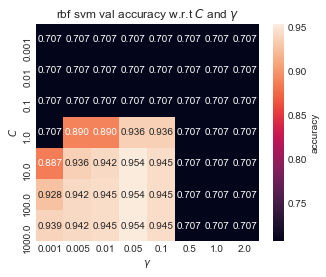

Test Accuracy for RBF SVM =  0.9725234996384671


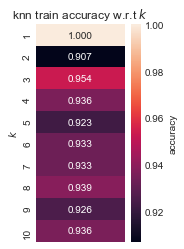

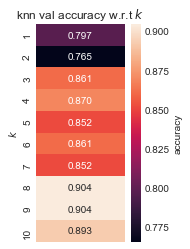

Test Accuracy for K Nearest Neighbors =  0.9038322487346349


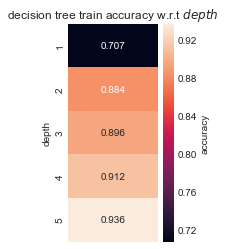

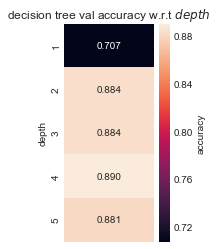

Test Accuracy for Decision Tree =  0.853940708604483


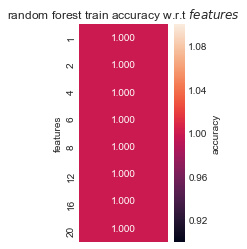

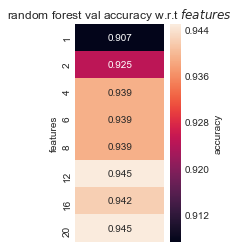

Test Accuracy for Random Forest =  0.9240780911062907


In [23]:
# different train/test partitions 
partitions = [0.8,0.5,0.2]
test_acc_arr = np.zeros((3,5))
train_acc_arr = np.zeros((3,5))
val_acc_arr = np.zeros((3,5))
param_arr = np.zeros((9,6))

# shuffle the data
X_and_Y = car_dataset.sample(frac=1)
        
# iterate through the different splits 
for i, partition in enumerate(partitions):
    print("Train Partition: ", partition)
    linear_svm_test_acc = []
    rbf_svm_test_acc = []
    knn_test_acc = []
    decision_tree_test_acc = []
    random_forest_test_acc = []
    
    # do three trials for each classifier
    for trial in range(3):
        
        X_and_Y = X_and_Y.sample(frac=1)
        
        X = X_and_Y.iloc[:, 0:-1] # First column to second last column: Features (numerical values) 
        Y = X_and_Y.iloc[:, -1] # make car accessibility class variable (1 is unaccessible, 0 otherwise)
        
        train_size = int(partition*len(X)) #Find the point where to partition the data
        
        X_train_val = X[:train_size]
        X_test      = X[train_size:]
        Y_train_val = Y[:train_size]
        Y_test      = Y[train_size:]
        
        # scale values from -1 to 1 
        scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train_val)
        X_train_val = scaling.transform(X_train_val)
        X_test = scaling.transform(X_test)
        
        # call each functionn and save the values returnred in appropriate arrays
        test_acc,best_train_0, best_val_0, param_0 = linearSVM()
        linear_svm_test_acc.append(test_acc)
        param_arr[i*3 + trial, 0] = param_0
        print("Test Accuracy for Linear SVM = ", test_acc)
        
        test_acc,best_train_1, best_val_1, param_1, param_2 = rbfSVM()
        rbf_svm_test_acc.append(test_acc)
        param_arr[i*3 + trial, 1] = param_1
        param_arr[i*3 + trial, 2] = param_2
        print("Test Accuracy for RBF SVM = ", test_acc)
        
        test_acc,best_train_2,best_val_2, param_3 = knn()
        knn_test_acc.append(test_acc)
        param_arr[i*3 + trial, 3] = param_3
        print("Test Accuracy for K Nearest Neighbors = ", test_acc)
        
        test_acc,best_train_3,best_val_3, param_4 = decisionTree()
        decision_tree_test_acc.append(test_acc)
        param_arr[i*3 + trial, 4] = param_4
        print("Test Accuracy for Decision Tree = ", test_acc)

        test_acc, best_train_4, best_val_4, param_5 = randomForest()
        random_forest_test_acc.append(test_acc)
        param_arr[i*3 + trial, 5] = param_5
        print("Test Accuracy for Random Forest = ", test_acc)

    
    # get the average accuracy over the three rounds for training, testing, and validation
    test_acc_arr[i, 0] = sum(linear_svm_test_acc)/3
    test_acc_arr[i, 1] = sum(rbf_svm_test_acc)/3
    test_acc_arr[i, 2] = sum(knn_test_acc)/3
    test_acc_arr[i, 3] = sum(decision_tree_test_acc)/3
    test_acc_arr[i, 4] = sum(random_forest_test_acc)/3

    train_acc_arr[i, 0] = best_train_0
    train_acc_arr[i, 1] = best_train_1
    train_acc_arr[i, 2] = best_train_2
    train_acc_arr[i, 3] = best_train_3
    train_acc_arr[i, 4] = best_train_4

    val_acc_arr[i, 0] = best_val_0
    val_acc_arr[i, 1] = best_val_1
    val_acc_arr[i, 2] = best_val_2
    val_acc_arr[i, 3] = best_val_3
    val_acc_arr[i, 4] = best_val_4

In [24]:
train_df = pd.DataFrame(train_acc_arr)
train_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
train_df.index.name = 'Train Partition'
train_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
train_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,0.960926,1.0,0.981185,0.935965,1.0
50,0.957755,1.0,0.959491,0.937500,1.0
20,0.950724,1.0,0.939130,0.911662,1.0


In [25]:
val_df = pd.DataFrame(val_acc_arr)
val_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
val_df.index.name = 'Train Partition'
val_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
val_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,0.958755,0.998553,0.962373,0.937048,0.990593
50,0.943287,0.991898,0.932870,0.934028,0.978009
20,0.933333,0.953623,0.904348,0.889855,0.944928


In [26]:
test_df = pd.DataFrame(test_acc_arr)
test_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
test_df.index.name = 'Train Partition'
test_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
test_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,0.947013,0.997110,0.973025,0.936416,0.991329
50,0.952932,0.996528,0.954475,0.934028,0.976080
20,0.942637,0.974693,0.900940,0.888648,0.940950


In [27]:
param_df = pd.DataFrame(param_arr)
param_df.columns = ['C-Linear SVM', 'C-RBF SVM', 'Gamma-RBF SVM','K-K Nearest Neighbors', 
                    'Depth-Decision Tree', 'Features-Random Forest']
param_df.index.name = 'Train Partition'
param_df.rename(index = {0: "80", 1:"80",2 : "80", 3: "50", 4:"50", 5: "50", 6: "20", 7:"20", 8: "20"},inplace = True)
param_df

,C-Linear SVM,C-RBF SVM,Gamma-RBF SVM,K-K Nearest Neighbors,Depth-Decision Tree,Features-Random Forest
Train Partition,,,,,,
80,100.0,100.0,0.010,8.0,5.0,16.0
80,1000.0,10.0,0.050,8.0,5.0,16.0
80,1.0,10.0,0.050,8.0,5.0,16.0
50,1.0,10.0,0.050,7.0,5.0,16.0
50,1.0,1000.0,0.010,10.0,5.0,16.0
50,0.1,10.0,0.050,10.0,5.0,16.0
20,10.0,100.0,0.005,10.0,5.0,20.0
20,1.0,10.0,0.050,10.0,5.0,12.0
20,0.1,10.0,0.050,8.0,4.0,12.0
